<h2 style="color:#1f77b4;">Ejercicio 1</h2>

<h5 style="color:#1f77b4;">1. Generar un dataset de ejemplo.</h5>

In [9]:
import pandas as pd

In [13]:
df = pd.read_csv("data/Ecommerce.csv")

In [14]:
df.head()

,Unnamed: 0,fecha,ciudad,dispositivo,categoria_producto,metodo_pago,edad_cliente,productos_carrito,tiempo_sesion_min,rating_producto,precio_promedio,monto_total,compra_completada
0,0,2024-01-01 00:00:00,Santiago,Mobile,Electrónica,Transferencia,35.0,2,2.3,3.0,28845.0,49616.0,1
1,1,2024-01-01 01:00:00,La Serena,Mobile,Deportes,Tarjeta,34.0,2,2.8,4.0,17093.0,39289.0,1
2,2,2024-01-01 02:00:00,Concepción,Desktop,Ropa,Transferencia,35.0,4,19.0,NaN,13448.0,54205.0,0
3,3,2024-01-01 03:00:00,Valparaíso,Tablet,Ropa,Tarjeta,77.0,7,2.1,1.0,7583.0,59533.0,1
4,4,2024-01-01 04:00:00,Santiago,Mobile,Electrónica,Tarjeta,27.0,1,2.6,5.0,1886.0,1829.0,1


<h5 style="color:#1f77b4;">2. Aplicar detección y visualización de valores perdidos.</h5>

In [15]:
df.isnull().sum()

Unnamed: 0               0
fecha                    0
ciudad                   0
dispositivo              0
categoria_producto       0
metodo_pago           6675
edad_cliente          4399
productos_carrito        0
tiempo_sesion_min      847
rating_producto       9070
precio_promedio          0
monto_total              0
compra_completada        0
dtype: int64

In [16]:
nulos = df.isnull().sum()
porcentaje = (df.isnull().mean() * 100).round(2)

resumen_nulos = pd.DataFrame({
    "nulos": nulos,
    "porcentaje_%": porcentaje
}).sort_values("nulos", ascending=False)

resumen_nulos

,nulos,porcentaje_%
rating_producto,9070,36.28
metodo_pago,6675,26.70
edad_cliente,4399,17.60
tiempo_sesion_min,847,3.39
Unnamed: 0,0,0.00
categoria_producto,0,0.00
dispositivo,0,0.00
ciudad,0,0.00
fecha,0,0.00
productos_carrito,0,0.00


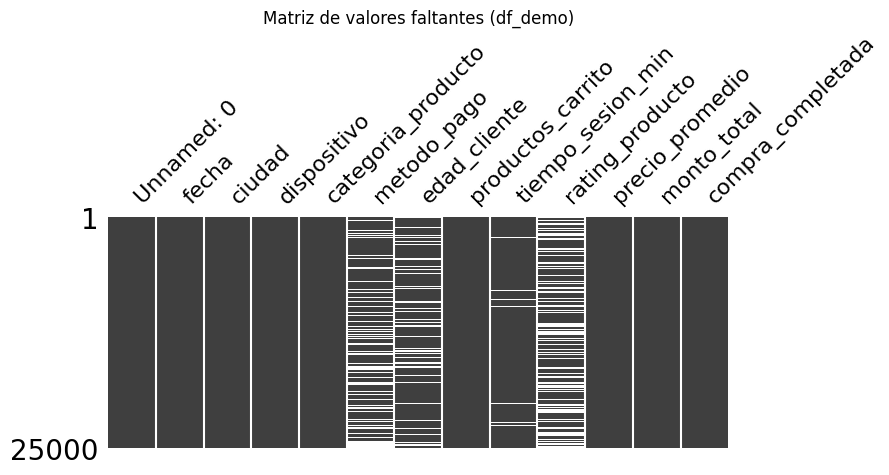

In [17]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df, figsize=(8, 3), sparkline=False)
plt.title("Matriz de valores faltantes (df_demo)")
plt.show()


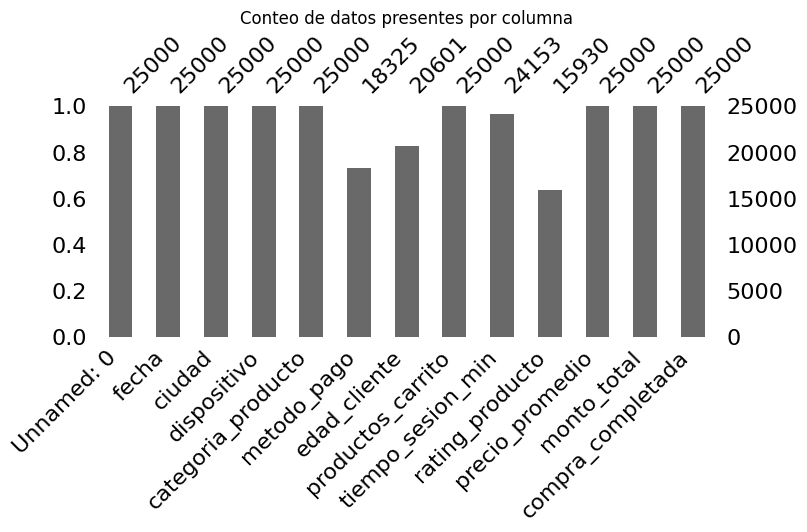

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

msno.bar(df, figsize=(8, 3))
plt.title("Conteo de datos presentes por columna")
plt.show()

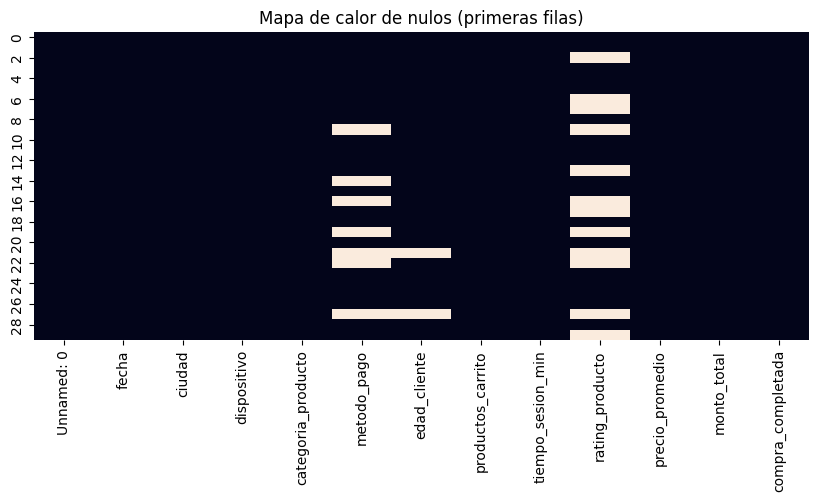

In [19]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.head(30).isnull(), cbar=False)
plt.title("Mapa de calor de nulos (primeras filas)")
plt.show()

<h5 style="color:#1f77b4;">3. Imputar o eliminar según corresponda.</h5>

In [20]:
df.isnull().sum()

Unnamed: 0               0
fecha                    0
ciudad                   0
dispositivo              0
categoria_producto       0
metodo_pago           6675
edad_cliente          4399
productos_carrito        0
tiempo_sesion_min      847
rating_producto       9070
precio_promedio          0
monto_total              0
compra_completada        0
dtype: int64

metodo_pago

In [29]:
df["metodo_pago"].value_counts()

metodo_pago
Tarjeta          11035
Transferencia     5515
Efectivo          1775
Name: count, dtype: int64

In [30]:
df_metodo = df.copy()

moda_metodo = df_metodo["metodo_pago"].mode()[0]

moda_metodo

'Tarjeta'

In [31]:

df_metodo["metodo_pago"] = df_metodo["metodo_pago"].fillna(moda_metodo)

df_metodo.isnull().sum()

Unnamed: 0               0
fecha                    0
ciudad                   0
dispositivo              0
categoria_producto       0
metodo_pago              0
edad_cliente          4399
productos_carrito        0
tiempo_sesion_min      847
rating_producto       9070
precio_promedio          0
monto_total              0
compra_completada        0
dtype: int64

edad_cliente, rating_producto y tiempo_sesion_min

In [33]:
df_mediana = df_metodo.copy()

df_mediana["edad_cliente"] = df_mediana["edad_cliente"].fillna(
    df_mediana["edad_cliente"].median()
)

df_mediana["tiempo_sesion_min"] = df_mediana["tiempo_sesion_min"].fillna(
    df_mediana["tiempo_sesion_min"].median()
)

df_mediana["rating_producto"] = df_mediana["rating_producto"].fillna(
    df_mediana["rating_producto"].median()
)

df_mediana.isnull().sum()

Unnamed: 0            0
fecha                 0
ciudad                0
dispositivo           0
categoria_producto    0
metodo_pago           0
edad_cliente          0
productos_carrito     0
tiempo_sesion_min     0
rating_producto       0
precio_promedio       0
monto_total           0
compra_completada     0
dtype: int64

<h5 style="color:#1f77b4;">4. Detectar y analizar outliers.</h5>

In [35]:
import numpy as np

df_detecta = df_mediana.copy()

df_detecta.describe()

,Unnamed: 0,edad_cliente,productos_carrito,tiempo_sesion_min,rating_producto,precio_promedio,monto_total,compra_completada
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000
mean,12499.500000,46.906640,3.990320,7.923584,3.891720,18298.527920,7.366319e+04,0.399880
std,7217.022701,12.255425,2.751489,7.681197,0.883916,16691.053565,9.817996e+04,0.489883
min,0.000000,5.000000,1.000000,0.000000,1.000000,571.000000,0.000000e+00,0.000000
25%,6249.750000,39.000000,2.000000,2.600000,4.000000,7852.000000,2.040525e+04,0.000000
50%,12499.500000,45.000000,3.000000,5.700000,4.000000,13426.500000,4.303950e+04,0.000000
75%,18749.250000,52.000000,5.000000,10.900000,4.000000,22913.000000,8.823450e+04,1.000000
max,24999.000000,134.000000,30.000000,202.278507,5.000000,297448.000000,2.594235e+06,1.000000


In [41]:
df_detecta["compra_completada"].value_counts()

compra_completada
0    15003
1     9997
Name: count, dtype: int64

In [47]:
df_detecta = df_detecta.rename(columns={"Unnamed: 0": "id_registro"})

In [49]:
df_detecta["compra_completada"] = df_detecta["compra_completada"].astype("category")
df_detecta["rating_producto"] = df_detecta["rating_producto"].astype("category")
df_detecta["id_registro"] = df_detecta["id_registro"].astype("category")

In [50]:
df_detecta.describe()

,edad_cliente,productos_carrito,tiempo_sesion_min,precio_promedio,monto_total
count,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,46.906640,3.990320,7.923584,18298.527920,7.366319e+04
std,12.255425,2.751489,7.681197,16691.053565,9.817996e+04
min,5.000000,1.000000,0.000000,571.000000,0.000000e+00
25%,39.000000,2.000000,2.600000,7852.000000,2.040525e+04
50%,45.000000,3.000000,5.700000,13426.500000,4.303950e+04
75%,52.000000,5.000000,10.900000,22913.000000,8.823450e+04
max,134.000000,30.000000,202.278507,297448.000000,2.594235e+06


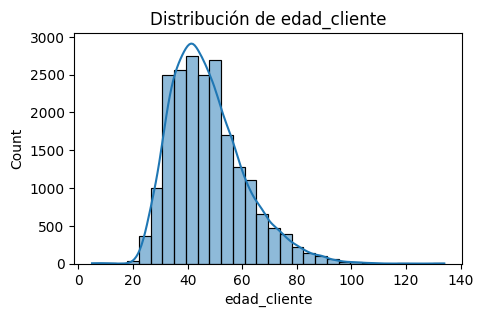

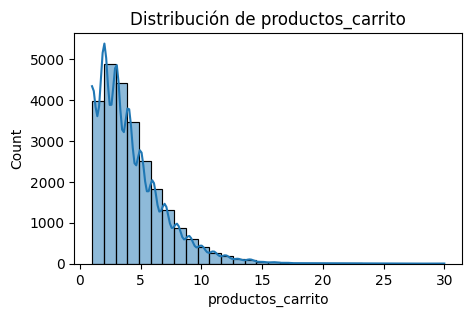

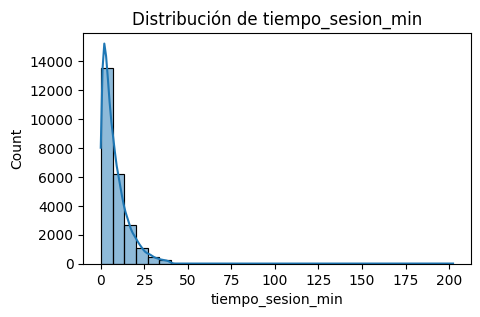

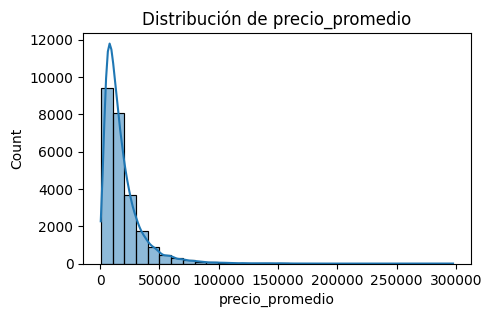

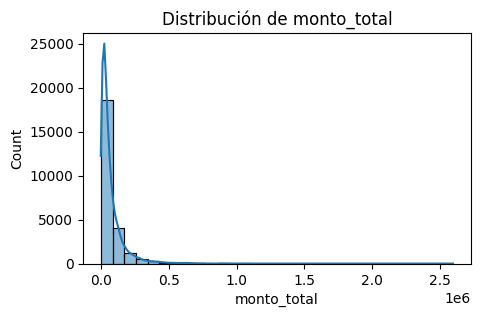

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    "edad_cliente",
    "productos_carrito",
    "tiempo_sesion_min",
    "precio_promedio",
    "monto_total"
]

for col in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()


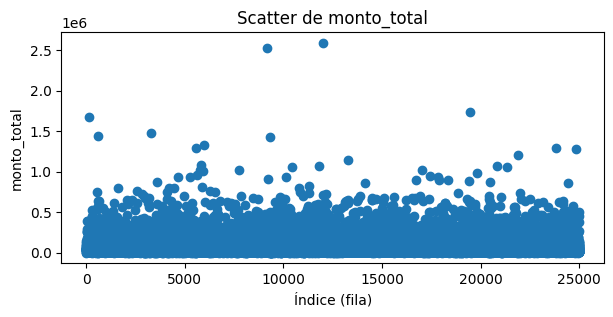

In [ ]:
plt.figure(figsize=(7, 3))
plt.scatter(range(len(df_detecta)), df_detecta["monto_total"])
plt.title("Scatter de monto_total")
plt.xlabel("Índice")
plt.ylabel("monto_total")
plt.show()

In [68]:
pd.options.display.float_format = '{:,.0f}'.format

In [69]:
df_detecta["monto_total"].describe()

count      25,000
mean       73,663
std        98,180
min             0
25%        20,405
50%        43,040
75%        88,234
max     2,594,235
Name: monto_total, dtype: float64

In [71]:
df_detecta[df_detecta["monto_total"] == df_detecta["monto_total"].max()]



,id_registro,fecha,ciudad,dispositivo,categoria_producto,metodo_pago,edad_cliente,productos_carrito,tiempo_sesion_min,rating_producto,precio_promedio,monto_total,compra_completada
12006,12006,2025-05-15 06:00:00,Santiago,Desktop,Electrónica,Tarjeta,42,7,4,4,"42,165","2,594,235",0


Detección de outliers con IQR

In [ ]:
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR

    outliers = df[
        (df[columna] < limite_inf) | (df[columna] > limite_sup)
    ]

    return outliers, limite_inf, limite_sup

In [75]:
out_iqr_edad, li, ls = detectar_outliers_iqr(df_detecta, "edad_cliente")

In [80]:
li, ls

(np.float64(19.5), np.float64(71.5))

In [78]:
df_detecta["edad_cliente"].describe()

count   25,000
mean        47
std         12
min          5
25%         39
50%         45
75%         52
max        134
Name: edad_cliente, dtype: float64

In [ ]:
print("Outliers en edad (IQR):", out_iqr_edad.shape[0])

Outliers en edad (IQR): 1214


In [79]:
out_iqr_edad.head()

,id_registro,fecha,ciudad,dispositivo,categoria_producto,metodo_pago,edad_cliente,productos_carrito,tiempo_sesion_min,rating_producto,precio_promedio,monto_total,compra_completada
3,3,2024-01-01 03:00:00,Valparaíso,Tablet,Ropa,Tarjeta,77,7,2,1,"7,583","59,533",1
8,8,2024-01-01 08:00:00,Valparaíso,Mobile,Ropa,Tarjeta,93,4,11,3,"6,427","28,290",1
20,20,2024-01-01 20:00:00,Valparaíso,Mobile,Libros,Tarjeta,80,4,28,5,"10,578","44,327",1
23,23,2024-01-01 23:00:00,Santiago,Mobile,Hogar,Tarjeta,72,3,8,5,"58,021","167,321",1
30,30,2024-01-02 06:00:00,Valparaíso,Mobile,Ropa,Tarjeta,72,6,10,4,"7,311","41,807",1
